In [11]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('C:/Users/user/Python/karpov.courses/projects/project_1/Проект_1_Задание_2.csv', sep = ';')

In [3]:
data.head()

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [23]:
data.dtypes

user_id          int64
revenue          int64
testgroup       object
exp_revenue    float64
dtype: object

In [26]:
data.isna().sum()

user_id        0
revenue        0
testgroup      0
exp_revenue    0
dtype: int64

In [4]:
data.groupby('testgroup').agg({'revenue': 'count'})

,revenue
testgroup,
a,202103
b,202667


In [5]:
data.groupby('testgroup').agg({'revenue': 'mean'})

,revenue
testgroup,
a,25.413720
b,26.751287


In [6]:
data.groupby('testgroup').agg({'revenue': 'median'})

,revenue
testgroup,
a,0.0
b,0.0


In [15]:
# кол-во платащих
data.query("revenue > 0").groupby('testgroup').agg({'revenue': 'count'})

,revenue
testgroup,
a,1928
b,1805


In [16]:
data.query("revenue > 0").groupby('testgroup').agg({'revenue': 'mean'})

,revenue
testgroup,
a,2663.998444
b,3003.658172


In [17]:
data.query("revenue > 0").groupby('testgroup').agg({'revenue': 'median'})

,revenue
testgroup,
a,311.0
b,3022.0


<AxesSubplot:xlabel='testgroup', ylabel='revenue'>

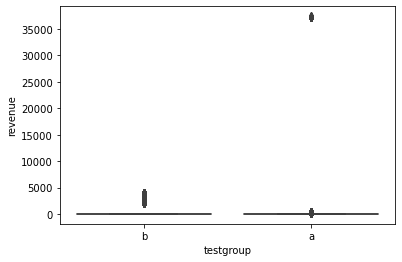

In [7]:
sns.boxplot(data = data, x = 'testgroup', y = 'revenue')

E:\Programs\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue'>

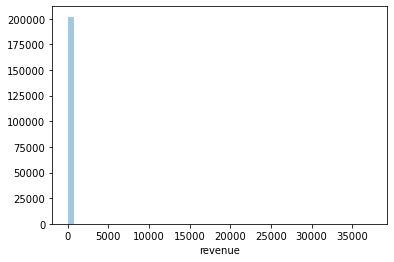

In [8]:
sns.distplot(data[data.testgroup == 'a'].revenue, kde = False)

<AxesSubplot:xlabel='revenue'>

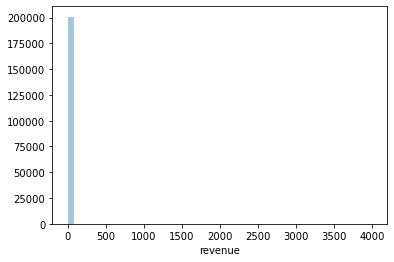

In [9]:
sns.distplot(data[data.testgroup == 'b'].revenue, kde = False)

In [10]:
data['exp_revenue'] = np.exp(data['revenue'])

E:\Programs\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

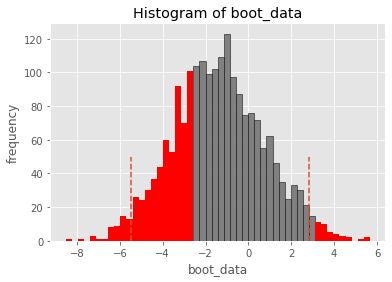

{'boot_data': [3.320737959312567,
  0.34204877952503365,
  -2.3010800969077354,
  -2.2358005990121725,
  -2.138577074708759,
  -1.8187075350205015,
  -0.011999980263190357,
  -2.4220470032121657,
  -3.1714388627650285,
  0.35550434949942517,
  -1.1507349494490964,
  -1.121509668569624,
  -3.4593890470574884,
  5.540053388070086,
  0.7372586558245793,
  -0.5178494772212545,
  -2.8843126902751806,
  -2.31924783018449,
  -0.7901039636447966,
  -0.9324458347930349,
  1.2326723146836929,
  -2.3186951995144747,
  -2.4574647081172563,
  -2.6544824761801378,
  -1.4607360843156507,
  -0.7763671441329866,
  -2.6736666551535277,
  -1.578362535587935,
  -1.4537196484874202,
  -4.242614732541559,
  -4.008654591028633,
  -1.4480255789052978,
  -3.3059649572944783,
  -2.361884273216656,
  -0.08876630137121486,
  -2.47632322973153,
  -1.7034692377150695,
  -1.4963708941268188,
  -3.641239076909413,
  0.22258187075350205,
  -1.6428032190736528,
  -2.7419560165197097,
  -6.0126957028031205,
  -3.4254861

In [21]:
get_bootstrap(
    data[data.testgroup == 'a'].revenue, # числовые значения первой выборки
    data[data.testgroup == 'b'].revenue, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

Вывод: средние статистически значимо не различаются

  0%|          | 0/2000 [00:00<?, ?it/s]

E:\Programs\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1953: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


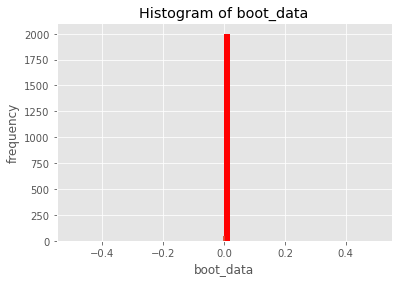

{'boot_data': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


In [20]:
get_bootstrap(
    data[data.testgroup == 'a'].revenue, # числовые значения первой выборки
    data[data.testgroup == 'b'].revenue, # числовые значения второй выборки
    boot_it = 2000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

Вывод: медиана нам ничего сказать не может

In [18]:
mannwhitneyu(data[data.testgroup == 'a'].revenue, 
             data[data.testgroup == 'b'].revenue)

MannwhitneyuResult(statistic=20491259376.0, pvalue=0.06269701316074398)

Вывод: средние статистически значимо не различаются

Итого:

Получил выборку. Она репрезентативная.

Гистограмма и boxplot дает понять, что t-test тут не поможет. Используем М-У и Bootstrap.

Оба способа показали, что значения в обоих случаях статистически значимо не отличаются друг от друга.
Я бы рекомендовал оставить прежний набор акционных предложений.